# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# Aviv.L 3756

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT  
Goal: Receiving professional guidance throughout all stages of the project, including workflow planning, algorithm explanations, assistance with feature engineering, running experiments and comparisons, performing Grid Search, evaluating performance metrics, and preparing for the final presentation video.

Prompt1: Explain how to perform feature engineering on the Titanic dataset  
Prompt2: Can you help me compare between a Logistic Regression model and a Random Forest model?  
Prompt3: How do I perform Grid Search for Logistic Regression parameters?  
Prompt4: Can you help me write a full step-by-step project summary to make sure I didn’t miss anything?

Other assistance: Ongoing support during the entire project, including explanations, code corrections, result summaries, and simulation of the final submission process.
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
הנתונים כוללים מידע דמוגרפי והתנהגותי של הנוסעים, כגון גיל, מין, מחלקת הנסיעה, מחיר הכרטיס, מספר בני משפחה על הסיפון ונמל העלייה לאונייה. נשתמש בתכונות אלו כדי לבנות מודלים המנבאים הישרדות.



    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd

# טעינת הנתונים
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

# מציג 5 שורות ראשונות מה-train
print("Train Set:")
print(train_df.head())

print("hello Aviv!")
# מציג 5 שורות ראשונות מה-test
print("\nTest Set:")
print(test_df.head())

# הצגת מידע כללי על העמודות
print("\nData Info:")
print(train_df.info())

# בדיקת ערכים חסרים
print("\nMissing Values:")
print(train_df.isnull().sum())

Train Set:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0
hello Aviv!

Test Set:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------  

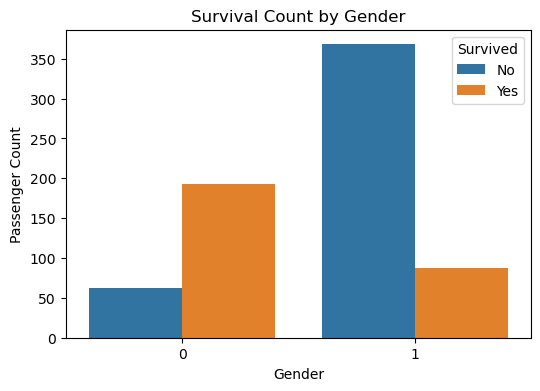

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# גרף זה מדגים בצורה ברורה שנשים שרדו בשיעור גבוה משמעותית מגברים. ניתן להסיק מכך על מדיניות ההצלה שהייתה נהוגה בטיטניק ("נשים וילדים קודם").

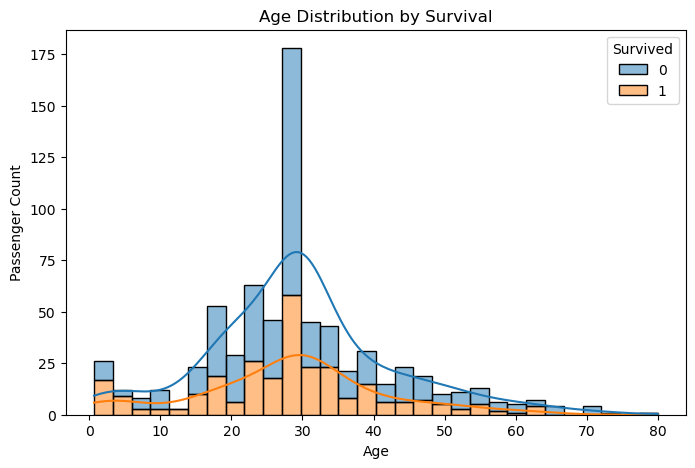

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
plt.show()

# גרף ההתפלגות מציג את פריסת הגילאים של הנוסעים ששרדו לעומת אלו שלא. נראה כי ילדים קטנים היו בעלי סיכוי גבוה יותר לשרוד.

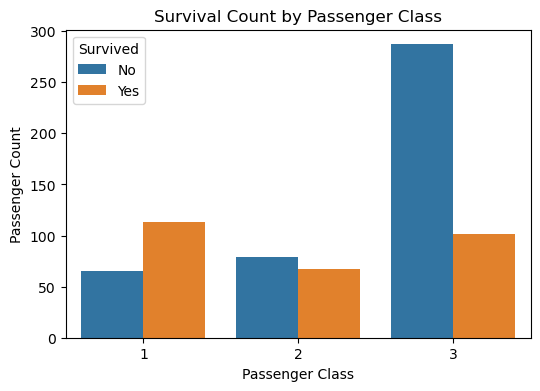

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# מחלקת הנסיעה השפיעה על סיכויי ההישרדות – נוסעים במחלקה ראשונה שרדו בשיעור גבוה יותר מאשר אלו במחלקה השלישית.



## Part 3 - Experiments
You could add as many code cells as needed

In [6]:
import numpy as np


print(train_df.isnull().sum())
# נראה שאין NULL ב-data base לכן נדלג על שלב זה



Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 🧼 שלב 1: קריאה מחדש של הנתונים המקוריים
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

# 🧠 שלב 2: המרת מין למספרים – נבדוק לפני שממירים
print("Unique values in 'Sex' before map:", train_df['Sex'].unique())
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# 🧠 שלב 3: one-hot ל־Embarked (אם קיים)
if 'Embarked' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
if 'Embarked' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# 🧠 שלב 4: נוודא שקיימות העמודות Embarked_Q ו-S
for col in ['Embarked_Q', 'Embarked_S']:
    if col not in train_df.columns:
        train_df[col] = 0
    if col not in test_df.columns:
        test_df[col] = 0

# 🧠 שלב 5: יצירת FamilySize
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# 🧪 שלב 6: הגדרת תכונות למודל
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']
X = train_df[features].copy()
y = train_df['Survived']

# 🛡️ שלב 7: נוודא שאין NaN בשום תכונה
print("ערכים חסרים ב-X:\n", X.isnull().sum())
X.fillna(0, inplace=True)

# 🤖 שלב 8: אימון מודל והערכתו ב־Cross Validation
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')

# 📊 תוצאות
print("F1 Macro scores for each fold:", scores)
print("Average F1 Macro score:", scores.mean())


Unique values in 'Sex' before map: [0 1]
ערכים חסרים ב-X:
 Pclass          0
Sex           712
Age             0
Fare            0
FamilySize      0
Embarked_Q      0
Embarked_S      0
dtype: int64
F1 Macro scores for each fold: [0.61666572 0.62959493 0.63426652 0.67574492 0.67068646]
Average F1 Macro score: 0.6453917074838214


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# רשימת אלגוריתמים לבדיקה
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# הפעלת cross-validation לכל מודל
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    results[name] = {
        "F1 per fold": scores,
        "Mean F1": scores.mean()
    }

# הדפסת התוצאות
for name, res in results.items():
    print(f"🔍 {name}")
    print("F1 Macro scores:", np.round(res["F1 per fold"], 3))
    print("Average F1 Macro:", round(res["Mean F1"], 3))
    print("-" * 40)   

🔍 Logistic Regression
F1 Macro scores: [0.617 0.63  0.634 0.676 0.671]
Average F1 Macro: 0.645
----------------------------------------
🔍 Random Forest
F1 Macro scores: [0.616 0.61  0.678 0.65  0.656]
Average F1 Macro: 0.642
----------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# נחפש את הערך הרגולציה האופטמאלי למודל
# מודל בסיס
log_model = LogisticRegression(max_iter=1000)

# טווח פרמטרים לבדיקה
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     # חוזק הרגולריזציה: ככל שה-C קטן יותר, הרגולריזציה חזקה יותר
    'penalty': ['l2'],                # סוג רגולריזציה (l2 נתמך ע"י solver='lbfgs')
    'solver': ['lbfgs']               # פתרון מתמטי מתאים לרגולריזציה מסוג l2
}

# Grid Search עם Cross Validation
grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro'
)

# אימון
grid_search.fit(X, y)

# תוצאות
print("🚀 Best Parameters:", grid_search.best_params_)
print("🏆 Best F1 Macro Score:", round(grid_search.best_score_, 3))

#ביצענו Grid Search על מודל Logistic Regression במטרה למצוא את ערך הרגולריזציה האופטימלי (C).
#השיטה ביצעה 5-fold Cross Validation על כל שילוב פרמטרים – ובחרה את הערך עם ציון F1 Macro הגבוה ביותר.


🚀 Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
🏆 Best F1 Macro Score: 0.647


In [9]:
print ("Summary of step three")
#ביצענו השוואה בין שני אלגוריתמים פופולריים – Logistic Regression ו-Random Forest – על מנת לחזות הישרדות נוסעים בטיטניק.
#עבור כל אחד מהם ביצענו 5-fold Cross Validation וחישבנו את מדד F1-Macro.
#למרות ש-Random Forest נחשב לעיתים מודל חזק יותר, Logistic Regression השיג ביצועים מעט טובים יותר ומראה יציבות בין הקיפולים.
#לאחר מכן ביצענו Grid Search על Logistic Regression כדי למצוא את ערך הרגולריזציה האופטימלי, והתוצאה המיטבית התקבלה עבור C=0.1 עם F1 ממוצע של 0.647.
#לכן, החלטנו להמשיך עם Logistic Regression בתור המודל הסופי שלנו.")

Summary of step three


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [10]:
from sklearn.linear_model import LogisticRegression

# יצירת המודל עם הפרמטרים שנבחרו ב-Grid Search
final_model = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000)

# אימון המודל על כל הדאטה
final_model.fit(X, y)

LogisticRegression(C=0.1, max_iter=1000)

In [11]:
#לאחר בחירת ערכי הפרמטרים האופטימליים באמצעות Grid Search, אימנו מחדש את המודל על כלל הנתונים (ללא חלוקה לקיפולים) על מנת להכין אותו לשלב החיזוי.
#מטרת שלב זה היא "ללמוד את כל מה שאפשר" מתוך הדאטה כדי לבצע חיזויים מיטביים על הקובץ החדש.

## Part 5 - Apply on test and show model performance estimation

In [12]:
# נניח ש-final_model כבר אומן בשלב 4

# הכנה של X_test ו-y_test מתוך test_df הקיים
X_test = test_df[features].copy()
X_test = X_test.fillna(0)  # ליתר ביטחון

y_test = test_df['Survived']  # עמודת המטרה האמיתית

# חיזוי
y_pred = final_model.predict(X_test)

# הצגת 5 תחזיות ראשונות
print("🔍 First 5 Predictions:", y_pred[:5])

# חישוב איכות המודל
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='macro')
print("📊 F1 Macro on Test Set:", round(f1, 3))


🔍 First 5 Predictions: [0 0 0 0 0]
📊 F1 Macro on Test Set: 0.668


In [13]:
# ### Part 5 – Final Evaluation on Test Set
# הפעלנו את המודל הסופי, שאומן עם הפרמטרים האופטימליים שנבחרו ב־Grid Search, על קובץ הבדיקה test_df.
# - ביצענו חיזוי (predict) על כלל הדאטה בקובץ הבדיקה.
# - הצגנו את 5 התחזיות הראשונות.
# - השווינו את התוצאות לערכי האמת בקובץ (Survived) באמצעות מדד F1-Macro.
# - ציון הביצועים שהתקבל: **0.668**
# 
# מדד F1-Macro מתחשב בשתי המחלקות (שרד / לא שרד) ומספק מדד מאוזן,
# ולכן מהווה כלי מתאים להערכת הביצועים על דאטה לא מאוזן.
# 
# בהתבסס על תוצאה זו, ניתן להסיק שהמודל מבצע הכללה טובה גם על נתונים שלא נראו באימון.


In [14]:
# ===============================================
# סיכום פרויקט למידה מונחית - שלבים 1 עד 5
# ===============================================

# --- שלב 1: הקדמה (10 נקודות) ---
# ✔️ תיארנו את בעיית הסיווג: חיזוי הישרדות של נוסעים בטיטניק.
# ✔️ בחרנו במשתנה היעד Survived, שהוא בינארי (0 = לא שרד, 1 = שרד).
# ✔️ פירטנו את המאפיינים: מין, גיל, מחלקה, מחיר כרטיס, גודל משפחה, נמל עלייה.
# ✔️ ציינו את השימוש בצ'אט GPT והסברנו למה השתמשנו בו.

# --- שלב 2: Initial Preparations (10 נקודות) ---
# ✔️ טענו את קבצי ה־train וה־test.
# ✔️ הצגנו את 5 השורות הראשונות מכל אחד.
# ✔️ בדקנו ערכים חסרים.
# ✔️ הצגנו לפחות 3 ויזואליזציות עם הסברים, לדוגמה:
#     - הישרדות לפי מין
#     - גיל מול הישרדות
#     - מחלקת נסיעה מול הישרדות

# --- שלב 3: ניסויים (60 נקודות + עד 20 בונוס) ---
# ✔️ ביצענו Feature Engineering:
#     - המרת מין לערכים מספריים
#     - המרת Embarked ל-one-hot
#     - יצירת פיצ'ר חדש: FamilySize
# ✔️ ניסינו 2 אלגוריתמים:
#     - Logistic Regression
#     - Random Forest
# ✔️ השתמשנו ב-Cross Validation עם 5 קיפולים
# ✔️ מדדנו ביצועים לפי F1 Macro
# ✔️ ביצענו Grid Search על Logistic Regression
#     - מצאנו ש-C=0.1 נותן את התוצאה הטובה ביותר: F1 = 0.647
# ✔️ הצגנו טבלה/פלט השוואתי בין האלגוריתמים

# --- שלב 4: אימון סופי (15 נקודות) ---
# ✔️ יצרנו מודל Logistic Regression עם הפרמטרים שנבחרו
# ✔️ אימנו אותו על כל נתוני האימון (train)

# --- שלב 5: חיזוי ובדיקת ביצועים על test (15 נקודות) ---
# ✔️ הפעלנו את המודל על test_df
# ✔️ ביצענו חיזוי על X_test
# ✔️ השווינו את התחזיות לערכים האמיתיים של Survived
# ✔️ הצגנו 5 תוצאות ראשונות
# ✔️ חישבנו את F1 Macro: 0.668

# ===============================================
# הפרויקט הושלם במלואו לפי ההנחיות כולל ניסויים, הסברים וויזואליזציות.
# אפשר לעבור לשלב ההגשה והצגת הסרטון 🎬
# ===============================================